In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Training images shape: (536, 256, 256)
Training masks shape: (536, 256, 256, 1)
Validation images shape: (134, 256, 256)
Validation masks shape: (134, 256, 256, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 256, 256,  │     36,928 │ activation_26[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 256, 256,  │        128 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_13 (Add)        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_27       │ (None, 256, 256,  │          0 │ add_13[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ activation_27[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_28       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 128, 128,  │    147,584 │ activation_28[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 128, 128,  │      8,320 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_44[0][0] 

 Total params: 39,091,009 (149.12 MB)

 Trainable params: 39,067,585 (149.03 MB)

 Non-trainable params: 23,424 (91.50 KB)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7371 - accuracy_metric: 0.7371 - dice_coef: 0.3706 - iou_metric: 0.3695 - loss: 0.5301 - precision_metric: 0.4148 - recall_metric: 0.7716
Epoch 1: val_loss improved from inf to 0.69840, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.7404 - accuracy_metric: 0.7405 - dice_coef: 0.3735 - iou_metric: 0.3736 - loss: 0.5254 - precision_metric: 0.4197 - recall_metric: 0.7726 - val_accuracy: 0.3363 - val_accuracy_metric: 0.3326 - val_dice_coef: 0.1948 - val_iou_metric: 0.1207 - val_loss: 0.6984 - val_precision_metric: 0.1258 - val_recall_metric: 0.7536
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9394 - accuracy_metric: 0.9394 - dice_coef: 0.6297 - iou_metric: 0.6799 - loss: 0.1846 - precision_metric: 0.8010 - recall_metric: 0.8015
Epoch 2: val_loss improved from 0.69840 to 0.62114, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9394 - accuracy_metric: 0.9394 - dice_coef: 0.6298 - iou_metric: 0.6795 - loss: 0.1845 - precision_metric: 0.8009 - recall_metric: 0.8013 - val_accuracy: 0.8659 - val_accuracy_metric: 0.8678 - val_dice_coef: 0.1908 - val_iou_metric: 0.0187 - val_loss: 0.6211 - val_precision_metric: 0.1694 - val_recall_metric: 0.0207
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9594 - accuracy_metric: 0.9594 - dice_coef: 0.7146 - iou_metric: 0.7431 - loss: 0.1234 - precision_metric: 0.8592 - recall_metric: 0.8478
Epoch 3: val_loss improved from 0.62114 to 0.48396, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9594 - accuracy_metric: 0.9594 - dice_coef: 0.7152 - iou_metric: 0.7434 - loss: 0.1233 - precision_metric: 0.8593 - recall_metric: 0.8481 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1795 - val_iou_metric: 7.0057e-07 - val_loss: 0.4840 - val_precision_metric: 0.2444 - val_recall_metric: 7.0058e-07
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9631 - accuracy_metric: 0.9631 - dice_coef: 0.7638 - iou_metric: 0.7732 - loss: 0.1080 - precision_metric: 0.8766 - recall_metric: 0.8685
Epoch 4: val_loss improved from 0.48396 to 0.45443, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9630 - accuracy_metric: 0.9630 - dice_coef: 0.7632 - iou_metric: 0.7724 - loss: 0.1084 - precision_metric: 0.8761 - recall_metric: 0.8680 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1789 - val_iou_metric: 5.4877e-04 - val_loss: 0.4544 - val_precision_metric: 0.5137 - val_recall_metric: 5.4906e-04
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9628 - accuracy_metric: 0.9628 - dice_coef: 0.7457 - iou_metric: 0.7564 - loss: 0.1091 - precision_metric: 0.8639 - recall_metric: 0.8613
Epoch 5: val_loss improved from 0.45443 to 0.36690, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9628 - accuracy_metric: 0.9627 - dice_coef: 0.7461 - iou_metric: 0.7565 - loss: 0.1090 - precision_metric: 0.8640 - recall_metric: 0.8613 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1525 - val_iou_metric: 9.8603e-13 - val_loss: 0.3669 - val_precision_metric: 1.0000 - val_recall_metric: 9.8603e-13
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9636 - accuracy_metric: 0.9636 - dice_coef: 0.7873 - iou_metric: 0.7785 - loss: 0.1022 - precision_metric: 0.8750 - recall_metric: 0.8773
Epoch 6: val_loss improved from 0.36690 to 0.35728, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9637 - accuracy_metric: 0.9637 - dice_coef: 0.7873 - iou_metric: 0.7786 - loss: 0.1021 - precision_metric: 0.8753 - recall_metric: 0.8773 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1563 - val_iou_metric: 9.9502e-06 - val_loss: 0.3573 - val_precision_metric: 0.8010 - val_recall_metric: 9.9535e-06
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9663 - accuracy_metric: 0.9663 - dice_coef: 0.7974 - iou_metric: 0.7891 - loss: 0.0946 - precision_metric: 0.8839 - recall_metric: 0.8812
Epoch 7: val_loss improved from 0.35728 to 0.35264, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9662 - accuracy_metric: 0.9663 - dice_coef: 0.7974 - iou_metric: 0.7891 - loss: 0.0946 - precision_metric: 0.8840 - recall_metric: 0.8811 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1334 - val_iou_metric: 9.8603e-13 - val_loss: 0.3526 - val_precision_metric: 1.0000 - val_recall_metric: 9.8603e-13
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9674 - accuracy_metric: 0.9675 - dice_coef: 0.7967 - iou_metric: 0.7883 - loss: 0.0899 - precision_metric: 0.8727 - recall_metric: 0.8924
Epoch 8: val_loss did not improve from 0.35264
34/34 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9674 - accuracy_metric: 0.9675 - dice_coef: 0.7970 - iou_metric: 0.7885 - loss: 0.0899 - precision_metric: 0.8731 - recall_metric: 0.8923 - val_accuracy: 0.8770 - val_accuracy_metric: 0.8788 - val_dice_coef: 0.0882 - val_iou_metric: 5.6920e-04 - val_loss: 0.4106 - val_precision_metric: 0.4778 - val_recall_metric: 5.710

34/34 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.9708 - accuracy_metric: 0.9708 - dice_coef: 0.8294 - iou_metric: 0.8115 - loss: 0.0776 - precision_metric: 0.8924 - recall_metric: 0.9003 - val_accuracy: 0.8013 - val_accuracy_metric: 0.8061 - val_dice_coef: 0.3863 - val_iou_metric: 0.2546 - val_loss: 0.3421 - val_precision_metric: 0.3857 - val_recall_metric: 0.4994
Epoch 14/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9710 - accuracy_metric: 0.9710 - dice_coef: 0.8343 - iou_metric: 0.8123 - loss: 0.0770 - precision_metric: 0.8926 - recall_metric: 0.9014
Epoch 14: val_loss did not improve from 0.34213
34/34 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9710 - accuracy_metric: 0.9710 - dice_coef: 0.8345 - iou_metric: 0.8125 - loss: 0.0769 - precision_metric: 0.8928 - recall_metric: 0.9014 - val_accuracy: 0.7851 - val_accuracy_metric: 0.7903 - val_dice_coef: 0.3135 - val_iou_metric: 0.1859 - val_loss: 0.4588 - val_precision_metric: 0.3355 - val_recall_metric: 0.3683
Epoch 15

34/34 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9707 - accuracy_metric: 0.9707 - dice_coef: 0.8377 - iou_metric: 0.8157 - loss: 0.0757 - precision_metric: 0.8995 - recall_metric: 0.8986 - val_accuracy: 0.8491 - val_accuracy_metric: 0.8513 - val_dice_coef: 0.4349 - val_iou_metric: 0.3056 - val_loss: 0.3266 - val_precision_metric: 0.4895 - val_recall_metric: 0.5082
Epoch 17/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9714 - accuracy_metric: 0.9714 - dice_coef: 0.8432 - iou_metric: 0.8167 - loss: 0.0735 - precision_metric: 0.8962 - recall_metric: 0.9048
Epoch 17: val_loss improved from 0.32655 to 0.27938, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9714 - accuracy_metric: 0.9714 - dice_coef: 0.8432 - iou_metric: 0.8169 - loss: 0.0735 - precision_metric: 0.8964 - recall_metric: 0.9047 - val_accuracy: 0.9184 - val_accuracy_metric: 0.9208 - val_dice_coef: 0.5376 - val_iou_metric: 0.4645 - val_loss: 0.2794 - val_precision_metric: 0.7592 - val_recall_metric: 0.5758
Epoch 18/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9716 - accuracy_metric: 0.9716 - dice_coef: 0.8407 - iou_metric: 0.8170 - loss: 0.0754 - precision_metric: 0.8978 - recall_metric: 0.9017
Epoch 18: val_loss did not improve from 0.27938
34/34 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9716 - accuracy_metric: 0.9716 - dice_coef: 0.8409 - iou_metric: 0.8173 - loss: 0.0752 - precision_metric: 0.8980 - recall_metric: 0.9018 - val_accuracy: 0.8691 - val_accuracy_metric: 0.8702 - val_dice_coef: 0.5451 - val_iou_metric: 0.4005 - val_loss: 0.2917 - val_precision_metric: 0.5669 - val_recall_metric: 0.6591
Epoch 19

34/34 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9734 - accuracy_metric: 0.9733 - dice_coef: 0.8588 - iou_metric: 0.8353 - loss: 0.0690 - precision_metric: 0.9139 - recall_metric: 0.9077 - val_accuracy: 0.8838 - val_accuracy_metric: 0.8843 - val_dice_coef: 0.6582 - val_iou_metric: 0.5293 - val_loss: 0.1951 - val_precision_metric: 0.5713 - val_recall_metric: 0.8920
Epoch 20/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9746 - accuracy_metric: 0.9746 - dice_coef: 0.8521 - iou_metric: 0.8316 - loss: 0.0659 - precision_metric: 0.9083 - recall_metric: 0.9083
Epoch 20: val_loss improved from 0.19512 to 0.07737, saving model to resunet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9745 - accuracy_metric: 0.9745 - dice_coef: 0.8521 - iou_metric: 0.8314 - loss: 0.0660 - precision_metric: 0.9083 - recall_metric: 0.9082 - val_accuracy: 0.9706 - val_accuracy_metric: 0.9708 - val_dice_coef: 0.8055 - val_iou_metric: 0.7899 - val_loss: 0.0774 - val_precision_metric: 0.8658 - val_recall_metric: 0.8999

--- Evaluating the Model ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 771ms/step - accuracy: 0.9693 - accuracy_metric: 0.9695 - dice_coef: 0.8027 - iou_metric: 0.7810 - loss: 0.0793 - precision_metric: 0.8539 - recall_metric: 0.9014
Validation Loss: 0.0774
Validation Accuracy: 0.9706
Validation IoU: 0.7871
Validation Dice Coefficient: 0.8014
Validation Precision: 0.8631
Validation Recall: 0.8991
Validation Overall Accuracy: 0.9710

--- Visualizing Predictions on Validation Set ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━

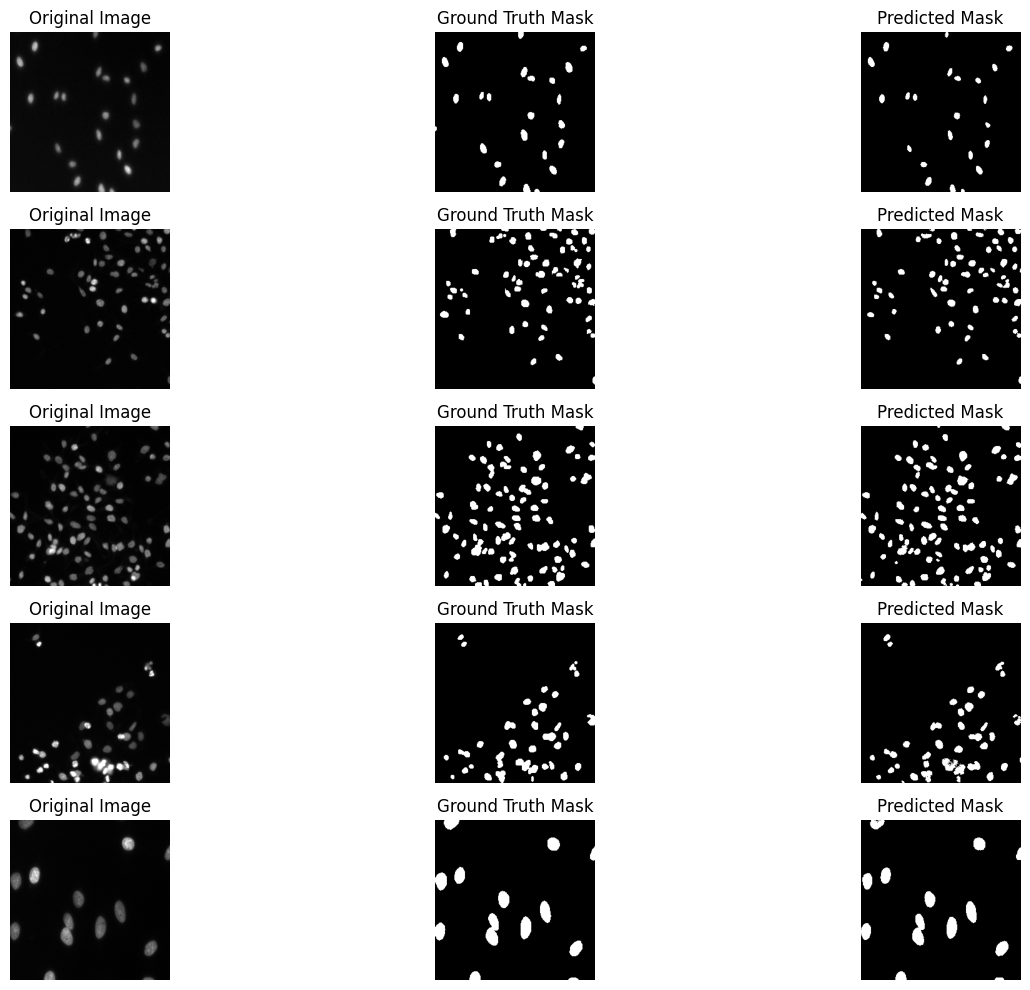

In [4]:
# --- Data Paths ---
DATA_DIR = '/content/drive/MyDrive' # Adjust this to your main dataset directory
TRAIN_IMG_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/all_images'
TRAIN_MASK_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/merged_masks'

# --- Parameters ---
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1 # Assuming grayscale images, change to 3 for RGB
NUM_CLASSES = 1 # Binary segmentation (nuclei vs. background)
BATCH_SIZE = 16
EPOCHS = 20
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.2 # Percentage of training data to use for validation

# --- Helper Functions ---
def load_data(img_dir, mask_dir, img_height, img_width, channels):
    images = []
    masks = []
    img_filenames = sorted(os.listdir(img_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(img_filenames, mask_filenames):
        if not img_file.startswith('.') and not mask_file.startswith('.'):
            img_path = os.path.join(img_dir, img_file)
            mask_path = os.path.join(mask_dir, mask_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if channels == 1 else cv2.IMREAD_COLOR)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is not None and mask is not None:
                img = cv2.resize(img, (img_width, img_height))
                mask = cv2.resize(mask, (img_width, img_height), interpolation=cv2.INTER_NEAREST) # Keep binary nature

                img = img / 255.0
                mask = mask / 255.0
                mask = np.expand_dims(mask, axis=-1) # Add channel dimension

                images.append(img)
                masks.append(mask)

    return np.array(images, dtype=np.float32), np.array(masks, dtype=np.float32)

# Load all training data
X, Y = load_data(TRAIN_IMG_DIR, TRAIN_MASK_DIR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=VALIDATION_SPLIT, random_state=42) # You can change the random_state for different splits

print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {Y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {Y_val.shape}")

# --- ResU-Net Model ---
def residual_block(input_tensor, filters):
    conv1 = Conv2D(filters, 3, padding='same')(input_tensor)
    bn1 = BatchNormalization()(conv1)
    relu1 = Activation('relu')(bn1)
    conv2 = Conv2D(filters, 3, padding='same')(relu1)
    bn2 = BatchNormalization()(conv2)

    # Identity shortcut
    shortcut = Conv2D(filters, 1, padding='same')(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    merged = Add()([bn2, shortcut])
    relu_out = Activation('relu')(merged)
    return relu_out

def upsampling_block(input_tensor, skip_tensor, filters):
    up = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same')(input_tensor)
    merged = concatenate([up, skip_tensor], axis=3)
    conv1 = residual_block(merged, filters)
    conv2 = residual_block(conv1, filters)
    return conv2

def resunet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES):
    inputs = Input(shape=input_shape)

    # Contracting Path
    conv1 = residual_block(inputs, 64)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = residual_block(pool1, 128)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = residual_block(pool2, 256)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = residual_block(pool3, 512)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = residual_block(pool4, 1024)

    # Expanding Path
    up6 = upsampling_block(conv5, conv4, 512)
    up7 = upsampling_block(up6, conv3, 256)
    up8 = upsampling_block(up7, conv2, 128)
    up9 = upsampling_block(up8, conv1, 64)

    outputs = Conv2D(num_classes, 1, activation='sigmoid')(up9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the ResU-Net model
model = resunet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES)

# --- Metrics ---
def iou_metric(y_true, y_pred):
    intersection = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    union = K.sum(K.round(K.clip(y_true, 0, 1))) + K.sum(K.round(K.clip(y_pred, 0, 1))) - intersection
    iou = K.mean((intersection + K.epsilon()) / (union + K.epsilon()))
    return iou

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives + K.epsilon()) / (predicted_positives + K.epsilon())
    return precision

def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives + K.epsilon()) / (actual_positives + K.epsilon())
    return recall

def accuracy_metric(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

# Compile the model with added metrics
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy', iou_metric, dice_coef, precision_metric, recall_metric, accuracy_metric])

model.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('resunet_dsb18.h5', monitor='val_loss', save_best_only=True, verbose=1)

# --- Train the Model ---
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[early_stopping, model_checkpoint])

# --- Evaluate the Model ---
print("\n--- Evaluating the Model ---")
loss, accuracy, iou, dice, precision, recall, overall_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation IoU: {iou:.4f}")
print(f"Validation Dice Coefficient: {dice:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation Overall Accuracy: {overall_accuracy:.4f}")

# --- Visualize Predictions ---
print("\n--- Visualizing Predictions on Validation Set ---")
n_samples = 5
indices = np.random.choice(len(X_val), n_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, index in enumerate(indices):
    img = X_val[index]
    mask = Y_val[index]
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8) # Threshold the prediction

    plt.subplot(n_samples, 3, i * 3 + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 3)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Optional: Save the trained model ---
# model.save('resunet_dsb18_trained.h5')
# print("Trained model saved as resunet_dsb18_trained.h5")